In [188]:
import requests
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_groq import ChatGroq
from langchain_core.tools import tool
from langgraph.prebuilt import ToolNode, tools_condition
from langchain.schema import HumanMessage


In [189]:
load_dotenv()

False

In [190]:
@tool
def reclass_issues(query: str)->str:
    """Call the /reclass API to perform reclassification."""
    print({"answer":"Tool called"})
    return {"answer":"Tool called"}

In [ ]:
model =ChatGroq(api_key ="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", model="meta-llama/llama-4-scout-17b-16e-instruct")

tools=[reclass_issues]

model_with_tools=model.bind_tools(tools)


In [192]:
class ReclassState(TypedDict):
    """
    State definition for chatbot graph
    """
    
    question: str
    answer: str


In [193]:
def llm_qa(state: ReclassState) -> ReclassState:

    # extract the question from state
    question = state['question']

   

    # ask that question to the LLM
    answer = model_with_tools.invoke(question).content

    # update the answer in the state
    state['answer'] = answer

    return state

In [194]:
graph_builder = StateGraph(ReclassState)

graph_builder.add_node("llm_qa",llm_qa)
tool_node = ToolNode(tools=tools)

graph_builder.add_node("tools",tool_node)

graph_builder.add_conditional_edges(
    "llm_qa",
    tools_condition,
)
# add edges
graph_builder.add_edge(START, 'llm_qa')

graph_builder.add_edge('tools', 'llm_qa')

# compile
workflow =graph_builder.compile()

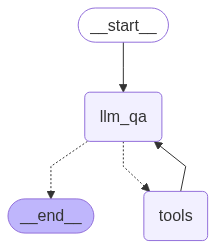

In [195]:
from IPython.display import Image, display
from langgraph.graph.message import add_messages

try:
    display(Image(workflow.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [196]:
# execute



final_state = workflow.invoke({"question": "Please reclass the tax issues"})

print(final_state["question"][-1].content)




ValueError: No messages found in input state to tool_edge: {'question': 'Please reclass the tax issues', 'answer': ''}